# COVID_DATA

### Dimensionality reduction and data visualization with Generative Topographic Mapping


### Importing python and RDKit

In [1]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import rdBase 
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors import _descList
from rdkit.ML.Descriptors import MoleculeDescriptors

### Reading in and reprocessing data for dimensionality reduction

In [3]:
data3 = pd.read_csv('data_covid_drugs.csv')
data3

,Unnamed: 0,comment,drug,drug_id,drug_specie,drug_synonyme,id,result,target,target_id,...,INCHIKEY,CID,MW,XLOGP,TPSA,COMPLEXITY,HBD,HBA,ROT,HEAVY_ATOM
0,0,NaN,Ledipasvir,2,NaN,NaN,1,positive,3C-like protease,1,...,VRTWBAAJJOHBQU-KMWAZVGDSA-N,67505836,888.413438,7.4,175.0,1820.0,4,10,12,65
1,1,NaN,Velpatasvir,3,NaN,NaN,2,positive,3C-like protease,1,...,FHCUMDQMBHQXKK-CDIODLITSA-N,67683363,882.406461,6.2,193.0,1690.0,4,10,13,65
2,2,NaN,Diosmin,4,NaN,"diosmetin 7-neohesperidoside ,Diosmetin 7-O-ru...",3,positive,3C-like protease,1,...,GZSOSUNBTXMUFQ-YFAPSIMESA-N,5281613,608.174120,-0.8,234.0,995.0,8,15,7,43
3,3,NaN,Hesperidin,5,NaN,NaN,4,positive,3C-like protease,1,...,QUQPHWDTPGMPEX-REDIAKJPSA-N,129010007,610.189770,-1.1,234.0,940.0,8,15,7,43
4,4,NaN,Teniposide,6,NaN,NaN,5,positive,3C-like protease,1,...,NRUKOCRGYNPUPR-DYPKOKSYSA-N,134694361,656.156362,1.2,189.0,1090.0,3,14,6,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,867,NaN,Glisoxepide,691,NaN,NaN,910,positive,Uridylate-specific endoribonuclease,39,...,ZKUDBRCEOBOWLF-UHFFFAOYSA-N,32778,449.173290,2.9,142.0,697.0,3,7,7,31
868,868,NaN,Idarubicin,92,NaN,NaN,911,positive,Uridylate-specific endoribonuclease,39,...,XDXDZDZNSLXDNA-TZNDIEGXSA-N,42890,497.168581,1.9,177.0,912.0,5,10,3,36
869,869,NaN,Tasosartan,692,NaN,NaN,912,positive,Uridylate-specific endoribonuclease,39,...,ADXGNEYLLLSOAR-UHFFFAOYSA-N,60919,411.180758,3.0,101.0,625.0,1,6,4,31
870,870,NaN,Dihydroergotamine,259,NaN,NaN,913,positive,Uridylate-specific endoribonuclease,39,...,LUZRJRNZXALNLM-JGRZULCMSA-N,10531,583.279469,2.4,118.0,1160.0,3,6,4,43


#### Removal of "useless" columns and visualzation of categorical attributes

In [4]:
data3.columns

Index(['Unnamed: 0', 'comment', 'drug', 'drug_id', 'drug_specie',
       'drug_synonyme', 'id', 'result', 'target', 'target_id', 'target_specie',
       'target_synonyme', 'type', 'SMILES', 'INCHIKEY', 'CID', 'MW', 'XLOGP',
       'TPSA', 'COMPLEXITY', 'HBD', 'HBA', 'ROT', 'HEAVY_ATOM'],
      dtype='object')

In [5]:
data3.drop("Unnamed: 0",axis=1,inplace=True)

Text(0, 0.5, 'COUNT')

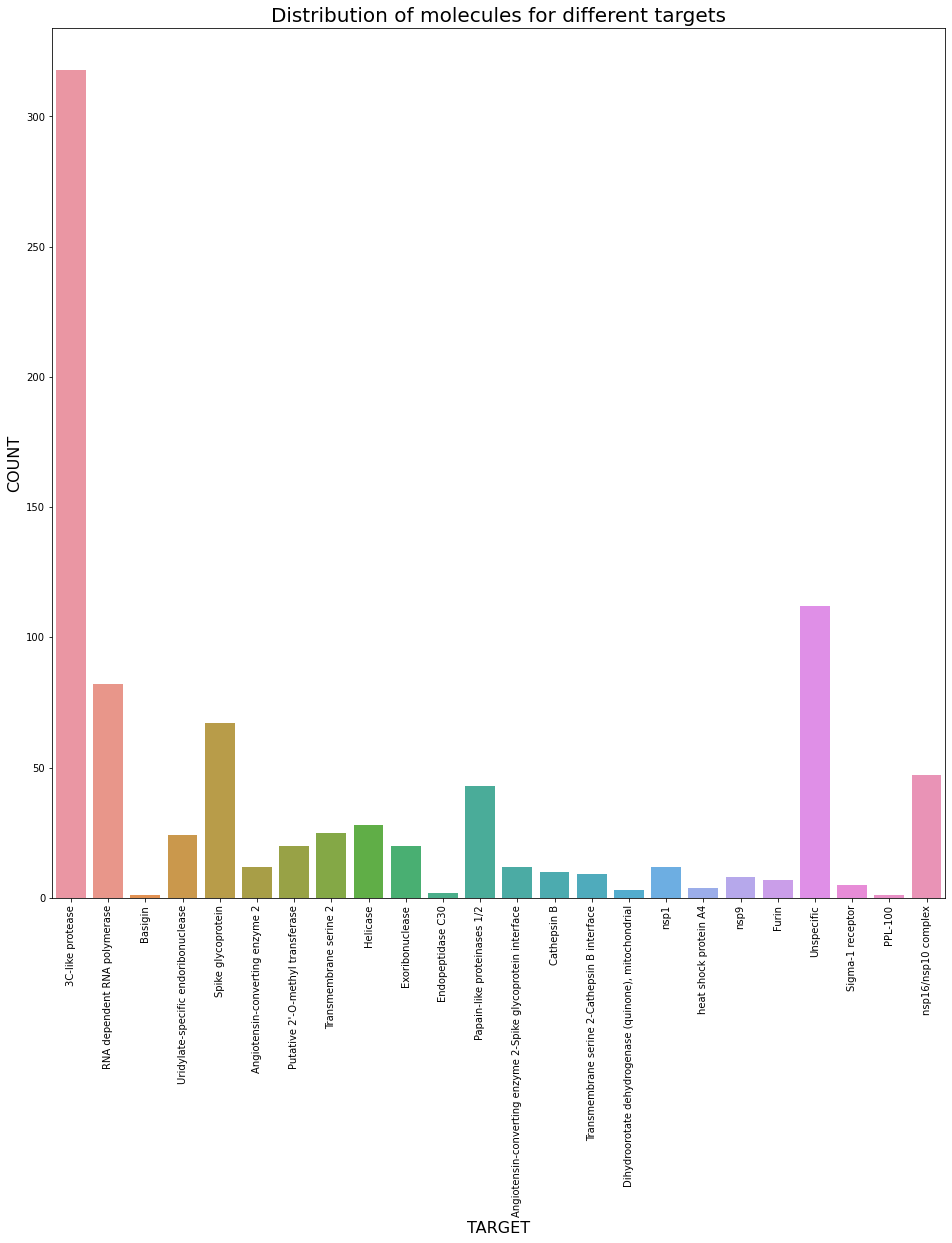

In [6]:
plt.figure(figsize=(16,16))
plt.title("Distribution of molecules for different targets",fontsize=20)
sns.countplot(data3["target"])
plt.xticks(rotation=90)

plt.xlabel("TARGET",fontsize=16)
plt.ylabel("COUNT",fontsize=16)

In [7]:
# Keeping only targets with >= 50 drugs
data3_mod1 = data3[ (data3["target"] == "3C-like protease") | 
      (data3["target"] == "RNA dependent RNA polymerase") |
     (data3["target"] == "Spike glycoprotein")]

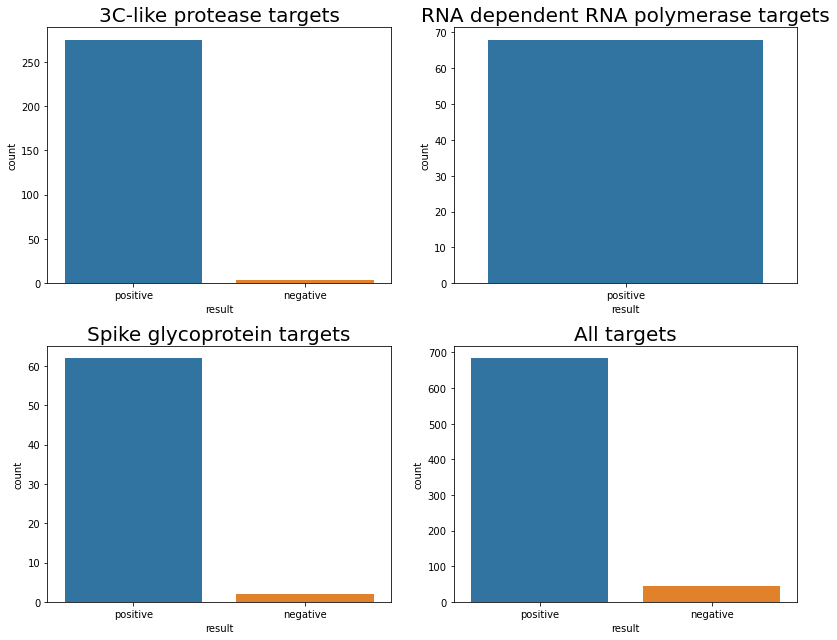

In [8]:
# Number of positive / negative compounds per individual target
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,9))

sns.countplot(data3[data3["target"] == "3C-like protease"]["result"], ax=ax[0][0])
sns.countplot(data3[data3["target"] == "RNA dependent RNA polymerase"]["result"], ax=ax[0][1])
sns.countplot(data3[data3["target"] == "Spike glycoprotein"]["result"], ax=ax[1][0])
sns.countplot(data3["result"])

ax[0][0].set_title("3C-like protease targets",fontsize=20)
ax[0][1].set_title("RNA dependent RNA polymerase targets",fontsize=20)
ax[1][0].set_title("Spike glycoprotein targets",fontsize=20)
ax[1][1].set_title("All targets",fontsize=20)

plt.tight_layout()

### Generating topological fingerprints from SMILES using RDKit

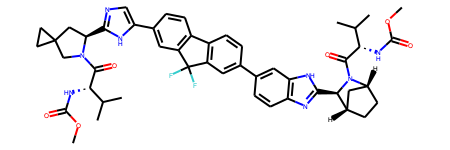

In [9]:
#Example of converting a SMILES into a bitstring representation

# Step 1: Convert smiles to 3D representation
molecule = Chem.MolFromSmiles(data3["SMILES"][0])
molecule

In [10]:
# Step 2: Convert 3D representation into a RDKit fingerprint
fingerprint = Chem.RDKFingerprint(molecule)

In [11]:
# Step 3: Extract the bit string
# Warning 2048 bits per molecule, can take up too much disk space!
bitstring = fingerprint.ToBitString()
#print([int(i) for i in list(bitstring)])

In [12]:
# Using MACCS keys instead
from rdkit.Chem import MACCSkeys

In [13]:
fingerprint = MACCSkeys.GenMACCSKeys(molecule)

In [14]:
print(fingerprint.ToBitString())

00000000000000000000001100000000000000100010000000000000000000100110000000110101000101010011110110101100011100111000011011110110010100101100111011111111011011111111110


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [19]:
bitstring_array = []


for i in range(len(data3["SMILES"])):
    mol = Chem.MolFromSmiles(data3["SMILES"][i])
    mol_to_bitstring = MACCSkeys.GenMACCSKeys(mol)
    bitstring = [int(i) for i in list(mol_to_bitstring.ToBitString())]
    
    bitstring_array.append(bitstring)

RDKit WARNING: [02:08:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [02:08:22] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [02:08:22] WARNING: not removing hydrogen atom without neighbors


In [23]:
# Converting the bit list into an array
bitstring_np_array = np.array(bitstring_array)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)

In [28]:
PC = pca.fit_transform(bitstring_np_array)

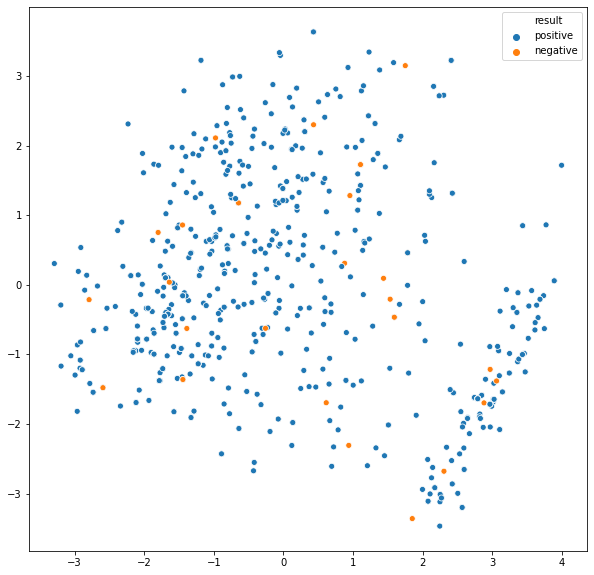

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(PC[:,0],PC[:,1],hue=data3["result"])